# Imputación de datos de temperaturas faltantes mediante Predicción 

## Objetivo del Proyecto

En este proyecto, analizaremos un dataset de temperaturas correspondiente a cuatro ciudades de Argentina. Este conjunto de datos incluye registros temperatura mínima, máxima y promedio. Sin embargo, hemos encontrado que muchos de estos registros presentan datos faltantes.

El objetivo principal es desarrollar un modelo de machine learning o deep learning que, según la técnica que ofrezca mayor precisión, nos permita completar los datos ausentes de temperaturas.

Comenzaremos enfocándonos en la ciudad de Resistencia.

Se desarrolla y evalúa cinco modelos de aprendizaje supervisados para predecir temperaturas en función de los datos disponibles:

1. Utilizaremos los datos de **TAVG** , **TMAX** y **LLOVIO** para predecir **TMIN**.
2. Utilizaremos los datos de **TAVG** , **TMIN** y **LLOVIO** para predecir **TMAX**.
3. Utilizaremos los datos de **TMAX** , **TMIN** y **LLOVIO** para predecir **TAVG**.
4. Utilizaremos los datos de **TAVG**  , **LLOVIO** para predecir **TMIN** y **TMAX**
5. Utilizaremos los datos de **TMIN**  , **LLOVIO** para predecir **TAVG** y **TMAX**
6. Utilizaremos los datos de **TMAX**  , **LLOVIO** para predecir **TMIN** y **TMAX**



In [27]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import joblib


df= pd.read_csv(filepath_or_buffer='estaciones_meteorol.csv', sep=',')
df.head(10)


,Unnamed: 0,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,1,"CORRIENTES, AR",1980-01-01,0.0,22.0,NaN,13.0
1,2,"CORRIENTES, AR",1980-01-02,0.0,24.0,NaN,14.0
2,3,"CORRIENTES, AR",1980-01-03,0.0,25.7,NaN,14.0
3,4,"CORRIENTES, AR",1980-01-04,NaN,28.1,NaN,NaN
4,5,"CORRIENTES, AR",1980-01-05,NaN,24.3,33.0,NaN
5,6,"CORRIENTES, AR",1980-01-06,5.1,27.7,NaN,20.0
6,7,"CORRIENTES, AR",1980-01-07,0.0,27.7,34.0,NaN
7,8,"CORRIENTES, AR",1980-01-08,39.1,25.7,34.0,18.0
8,9,"CORRIENTES, AR",1980-01-09,0.0,27.6,NaN,NaN
9,10,"CORRIENTES, AR",1980-01-10,0.0,27.9,33.0,20.0


## 1) Análisis exploratorio 

In [28]:
df['NAME'].unique()

array(['CORRIENTES, AR', 'BUENOS AIRES OBSERV, AR',
       'RESISTENCIA AERO, AR', 'MENDOZA AERO, AR'], dtype=object)

In [29]:
# vemos que tipo de datos tiene el data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60450 entries, 0 to 60449
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60450 non-null  int64  
 1   NAME        60450 non-null  object 
 2   DATE        60450 non-null  object 
 3   PRCP        25476 non-null  float64
 4   TAVG        53025 non-null  float64
 5   TMAX        40409 non-null  float64
 6   TMIN        51998 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
df_resistencia_completo= df[df['NAME']=='RESISTENCIA AERO, AR' ].copy()
df_resistencia_completo['llovio'] = df_resistencia_completo['PRCP'].apply(lambda x: 1 if x > 0 else 0)
df_resistencia_completo.head()

,Unnamed: 0,NAME,DATE,PRCP,TAVG,TMAX,TMIN,llovio
28574,28575,"RESISTENCIA AERO, AR",1980-01-01,0.0,19.6,25.8,11.0,0
28575,28576,"RESISTENCIA AERO, AR",1980-01-02,0.0,20.8,28.1,13.4,0
28576,28577,"RESISTENCIA AERO, AR",1980-01-03,0.0,22.7,30.7,14.0,0
28577,28578,"RESISTENCIA AERO, AR",1980-01-04,153.9,24.8,32.8,15.2,1
28578,28579,"RESISTENCIA AERO, AR",1980-01-05,0.0,23.4,33.2,20.8,0


Creamos un dataset con las columnas de temperaturas

In [31]:
df_resistencia=df_resistencia_completo.drop(columns=['PRCP','DATE','NAME','Unnamed: 0'])
display(df_resistencia.head(5))
display(df_resistencia.isnull().sum())

,TAVG,TMAX,TMIN,llovio
28574,19.6,25.8,11.0,0
28575,20.8,28.1,13.4,0
28576,22.7,30.7,14.0,0
28577,24.8,32.8,15.2,1
28578,23.4,33.2,20.8,0


TAVG        41
TMAX      4315
TMIN      1935
llovio       0
dtype: int64


Para entrenar estos modelos, separaremos las filas que contienen datos completos, a las que llamaremos `df_res_com`.

In [32]:
# DataFrame con todas las filas que tienen valores en las tres columnas
df_res_com = df_resistencia.dropna()
display(df_res_com.head())
print(f'la cantidad de datos con valores completos es de: \n{df_res_com.count()}')


,TAVG,TMAX,TMIN,llovio
28574,19.6,25.8,11.0,0
28575,20.8,28.1,13.4,0
28576,22.7,30.7,14.0,0
28577,24.8,32.8,15.2,1
28578,23.4,33.2,20.8,0


la cantidad de datos con valores completos es de: 
TAVG      10485
TMAX      10485
TMIN      10485
llovio    10485
dtype: int64


# 3_ GRÁFICOS PARA OBSERVAR LAS DISTRIBUCIONES


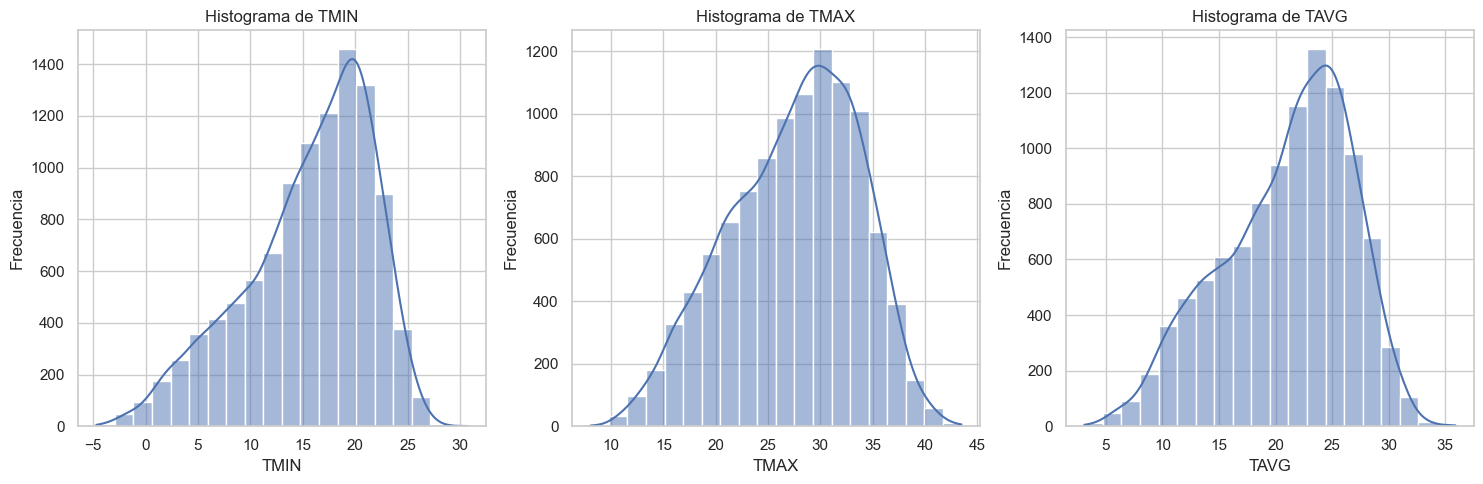

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

# Histograma para TMIN
plt.subplot(1, 3, 1)
sns.histplot(df_res_com['TMIN'], bins=20, kde=True)
plt.title('Histograma de TMIN')
plt.xlabel('TMIN')
plt.ylabel('Frecuencia')

# Histograma para TMAX
plt.subplot(1, 3, 2)
sns.histplot(df_res_com['TMAX'], bins=20, kde=True)
plt.title('Histograma de TMAX')
plt.xlabel('TMAX')
plt.ylabel('Frecuencia')

# Histograma para TAVG
plt.subplot(1, 3, 3)
sns.histplot(df_res_com['TAVG'], bins=20, kde=True)
plt.title('Histograma de TAVG')
plt.xlabel('TAVG')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

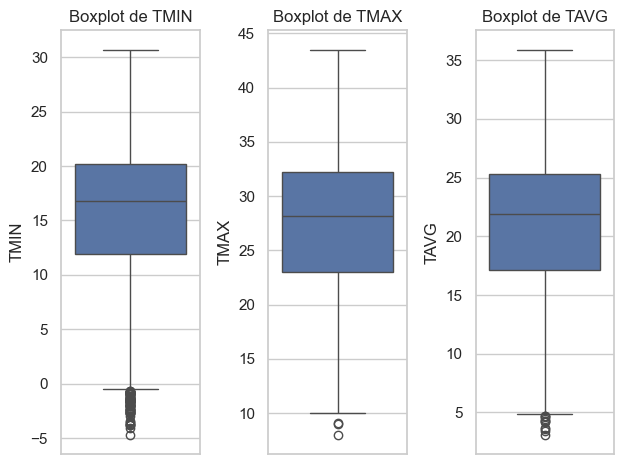

In [34]:
# Boxplot para TMIN
plt.subplot(1, 3, 1)
sns.boxplot(data=df_res_com, y='TMIN')
plt.title('Boxplot de TMIN')
plt.ylabel('TMIN')

# Boxplot para TMAX
plt.subplot(1, 3, 2)
sns.boxplot(data=df_res_com, y='TMAX')
plt.title('Boxplot de TMAX')
plt.ylabel('TMAX')

# Boxplot para TAVG
plt.subplot(1, 3, 3)
sns.boxplot(data=df_res_com, y='TAVG')
plt.title('Boxplot de TAVG')
plt.ylabel('TAVG')

# Mostrar los boxplots
plt.tight_layout()
plt.show()

Observamos una distribución normal en ambas temperaturas salvo por TMIN que esta un poco asimétrica pero en general al ser distribuciones similares.

Dividiremos el dataframe en 3 sub grupos - train_set, val_set, test_set

In [35]:
#función para particionar en 3 grupos train_set, val_set, test_set
def particionador(df, rstate=42, shuffle=True):
   
    train_set, test_set = train_test_split(df, test_size=0.3 , random_state=rstate, shuffle=shuffle)
    
    df=test_set
    
    test_set, val_set = train_test_split(df, test_size=0.5, random_state=rstate, shuffle=shuffle)
    
    return (train_set, val_set, test_set)

train_set, val_set, test_set = particionador(df=df_res_com,rstate=42, shuffle=True) 
print("Longitud del Training Set: ", len(train_set))
print("Longitud del Validation Set: ", len(val_set))
print("Longitud del Test Set: ", len(test_set))  

Longitud del Training Set:  7339
Longitud del Validation Set:  1573
Longitud del Test Set:  1573


# PRIMER MODELO:
1. Utilizaremos los datos de **TAVG** , **TMAX** y **LLOVIO** para predecir **TMIN**.

Por lo tanto separaremos **TMIN** ya que el mismo es el resultado

In [36]:
# Conjunto de datos general
X_df = df_res_com.drop("TMIN", axis=1)
y_df = df_res_com["TMIN"].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop("TMIN", axis=1)
y_train=train_set["TMIN"].copy()
# Conjunto de datos de validación
X_val = val_set.drop("TMIN", axis=1)
y_val = val_set["TMIN"].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop("TMIN", axis=1)
y_test= test_set["TMIN"].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TAVG  TMAX  llovio
33662  22.6  26.2       0
36945  22.2  26.6       1
36909  23.6  28.2       1
36378  10.1  16.6       0
31293  17.6  23.7       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
 33662    20.6
36945    19.0
36909    19.4
36378     4.2
31293    12.3
Name: TMIN, dtype: float64


## MODELO REGRESIÓN LINEAL

In [37]:
#entrenamiento, luego de preparar los datos empezaremos a realizar los entrenamientos 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenamos un algoritmo basado en regresión lineal
clf = LinearRegression()
clf.fit(X_train, y_train)

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = clf.predict(X_val)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = clf.predict(X_test)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)

Error Cuadrático Medio para el conjunto de validación 3.0323733580869163
R^2 Score para el conjunto de validación: 0.9196758676784181
Error Cuadrático Medio para el conjunto de test: 3.2977383985758744
R^2 Score para el conjunto de test: 0.9175728509289826


## MODELO SUPPORT VECTOR MACHINE 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# estandarización de los dataset
scaler_MIN = StandardScaler()
X_train_escalado = scaler_MIN.fit_transform(X_train)
X_test_escalado = scaler_MIN.transform(X_test)
X_val_escalado =scaler_MIN.transform(X_val)
# Guardar el scaler en un archivo
joblib.dump(scaler_MIN, 'scaler_TMIN.pkl')

# Entrenar el modelo SVR con kernel gaussiano (RBF)
SVR_TMIN = SVR(kernel='rbf')
SVR_TMIN.fit(X_train_escalado, y_train)
joblib.dump(SVR_TMIN, 'svr_TMIN.pkl')

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = SVR_TMIN.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TMIN.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)


Error Cuadrático Medio para el conjunto de validación 2.6522407455925046
R^2 Score para el conjunto de validación: 0.9297451496104467
Error Cuadrático Medio para el conjunto de test: 2.814558671519235
R^2 Score para el conjunto de test: 0.9296499542575518


## MODELO ARBOLES DE DECISIÓN VALORES CONTINUOS 

In [39]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de Naive Bayes con distribución gaussiana
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train)


# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = model_3.predict(X_val)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = model_3.predict(X_test)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)

Error Cuadrático Medio para el conjunto de validación 4.782036404252313
R^2 Score para el conjunto de validación: 0.8733292772549235
Error Cuadrático Medio para el conjunto de test: 5.297613062442608
R^2 Score para el conjunto de test: 0.8675858758817557


## MODELO CON RANDOM FOREST REGRESSOR

In [40]:
from sklearn.ensemble import RandomForestRegressor

model_4 = RandomForestRegressor(n_estimators=100, random_state=42) 
model_4.fit(X_train, y_train)

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = model_4.predict(X_val)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = model_4.predict(X_test)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)

Error Cuadrático Medio para el conjunto de validación 3.07152408993159
R^2 Score para el conjunto de validación: 0.9186388091787476
Error Cuadrático Medio para el conjunto de test: 3.5515663506308215
R^2 Score para el conjunto de test: 0.9112284075821545


## MODELO DEEP LEARNING CON TORCH

Epoch 1, Train Loss: 38.8416, Val Loss: 5.9934
Epoch 2, Train Loss: 5.1502, Val Loss: 4.1974
Epoch 3, Train Loss: 3.9751, Val Loss: 3.5148
Epoch 4, Train Loss: 3.5071, Val Loss: 3.2544
Epoch 5, Train Loss: 3.3163, Val Loss: 3.1202
Epoch 6, Train Loss: 3.2203, Val Loss: 3.0526
Epoch 7, Train Loss: 3.1703, Val Loss: 3.0322
Epoch 8, Train Loss: 3.1500, Val Loss: 2.9859
Epoch 9, Train Loss: 3.1023, Val Loss: 2.9639
Epoch 10, Train Loss: 3.0816, Val Loss: 2.9507
Epoch 11, Train Loss: 3.0692, Val Loss: 2.9416
Epoch 12, Train Loss: 3.0577, Val Loss: 2.9280
Epoch 13, Train Loss: 3.0773, Val Loss: 2.9231
Epoch 14, Train Loss: 3.0399, Val Loss: 2.9086
Epoch 15, Train Loss: 3.0348, Val Loss: 2.8990
Epoch 16, Train Loss: 3.0360, Val Loss: 2.8912
Epoch 17, Train Loss: 3.0244, Val Loss: 2.8905
Epoch 18, Train Loss: 3.0156, Val Loss: 2.8798
Epoch 19, Train Loss: 3.0094, Val Loss: 2.8702
Epoch 20, Train Loss: 3.0148, Val Loss: 2.8799


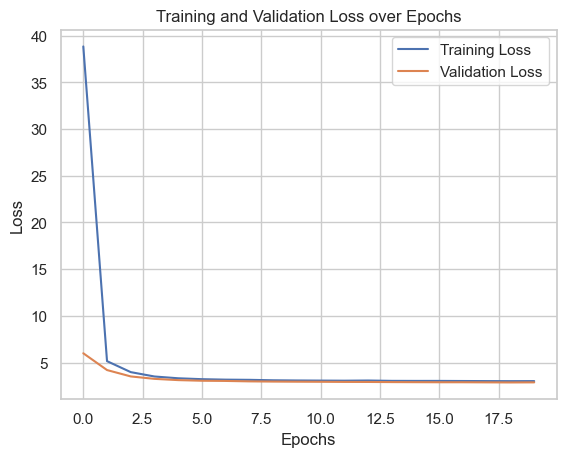

Error Cuadrático Medio para el conjunto de test: 3.0933638
R^2 Score para el conjunto de test: 0.9226811974401177


In [41]:
import torch
import torch.nn as nn
import torch.utils.data as data

# Convertir a tensores
X_train_tensor = torch.tensor(X_train_escalado, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val_escalado, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_escalado, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Crear dataset y data loader para el conjunto de entrenamiento
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 32)  # Tamaño de entrada es 2 (TAVG y TMAX)
        self.fc3 = nn.Linear(32, 1)   # Capa de salida

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))  # ReLU para la capa oculta
        x = self.fc3(x)  # Sin activación en la salida
        return x

# Instanciar el modelo y la función de pérdida
model = SimpleNN()
criterion = nn.MSELoss()  # Error cuadrático medio para regresión

# Hiperparámetros
learning_rate = 0.001
epochs = 20
train_losses = []
val_losses = []

# Bucle de entrenamiento
for epoch in range(epochs):
    total_train_loss = 0

    # Fase de entrenamiento
    model.train()
    for data_batch, target_batch in train_loader:
        output = model(data_batch)
        loss = criterion(output, target_batch)

        # Cero los gradientes
        model.zero_grad()

        # Retropropagación
        loss.backward()

        # Actualización manual de pesos
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        total_train_loss += loss.item()

    # Calcular la pérdida media de entrenamiento
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Fase de validación
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        val_output = model(X_val_tensor)
        val_loss = criterion(val_output, y_val_tensor)
        total_val_loss += val_loss.item()
    
    avg_val_loss = total_val_loss
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Graficar las pérdidas de entrenamiento y validación
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

# Probar el modelo final
with torch.no_grad():
    test_output = model(X_test_tensor)

# Calcular métricas
mse_test = mean_squared_error(y_test_tensor.numpy(), test_output.numpy())
r2_test = r2_score(y_test_tensor.numpy(), test_output.numpy())

# Mostrar resultados
print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)



## MODELO DEEP LEARNING CON OPTMIZADOR

## ADAM

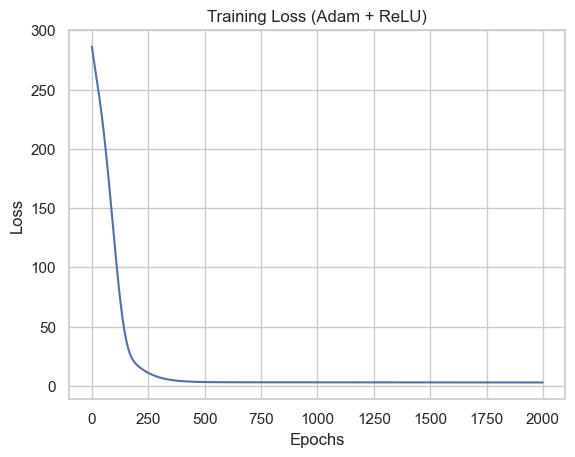

Error Cuadrático Medio para el conjunto de test: 2.8480458
R^2 Score para el conjunto de test: 0.928812941741892


In [42]:
import torch.optim as optim


# Convertir a tensores
X_train_tensor = torch.tensor(X_train_escalado, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val_escalado, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_escalado, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 32)  # Tamaño de entrada es 2 (TAVG y TMAX)
        self.fc3 = nn.Linear(32, 1)   # Capa de salida

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))  # ReLU para la capa oculta
        x = self.fc3(x)  # Sin activación en la salida
        return x

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()  # Error cuadrático medio para regresión
optimizer = optim.Adam(model.parameters(), lr=0.003, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

# Training loop
epochs = 2000
train_losses = []

for epoch in range(epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save training loss
    train_losses.append(loss.item())

# Plot training loss
plt.plot(train_losses)
plt.title('Training Loss (Adam + ReLU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Probar el modelo final
with torch.no_grad():
    test_output = model(X_test_tensor)

# Calcular métricas
mse_test = mean_squared_error(y_test_tensor.numpy(), test_output.numpy())
r2_test = r2_score(y_test_tensor.numpy(), test_output.numpy())

# Mostrar resultados
print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)


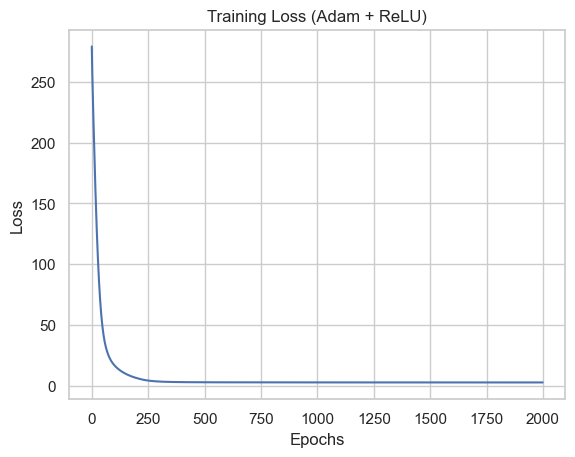

Error Cuadrático Medio para el conjunto de test: 2.7596595
R^2 Score para el conjunto de test: 0.9310221626533082


In [43]:

# Convertir a tensores
X_train_tensor = torch.tensor(X_train_escalado, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val_escalado, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_escalado, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 32)  # Tamaño de entrada es 2 (TAVG y TMAX)
        self.fc3 = nn.Linear(32, 1)   # Capa de salida

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))  # ReLU para la capa oculta
        x = self.fc3(x)  # Sin activación en la salida
        return x

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()  # Error cuadrático medio para regresión
optimizer = optim.RMSprop(model.parameters(), lr=0.003, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0)

# Training loop
epochs = 2000
train_losses = []

for epoch in range(epochs):
    model.train()
    
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save training loss
    train_losses.append(loss.item())

# Plot training loss
plt.plot(train_losses)
plt.title('Training Loss (Adam + ReLU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Probar el modelo final
with torch.no_grad():
    test_output = model(X_test_tensor)

# Calcular métricas
mse_test = mean_squared_error(y_test_tensor.numpy(), test_output.numpy())
r2_test = r2_score(y_test_tensor.numpy(), test_output.numpy())

# Mostrar resultados
print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)


# SEGUNDO MODELO:

2. Utilizaremos los datos de **TAVG** , **TMIN** y **LLOVIO** para predecir **TMAX**.

Por lo tanto separaremos **TMAX** ya que el mismo es el resultado

In [44]:
# Conjunto de datos general
X_df = df_res_com.drop("TMAX", axis=1)
y_df = df_res_com["TMAX"].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop("TMAX", axis=1)
y_train=train_set["TMAX"].copy()
# Conjunto de datos de validación
X_val = val_set.drop("TMAX", axis=1)
y_val = val_set["TMAX"].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop("TMAX", axis=1)
y_test= test_set["TMAX"].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TAVG  TMIN  llovio
33662  22.6  20.6       0
36945  22.2  19.0       1
36909  23.6  19.4       1
36378  10.1   4.2       0
31293  17.6  12.3       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
 33662    26.2
36945    26.6
36909    28.2
36378    16.6
31293    23.7
Name: TMAX, dtype: float64


In [45]:

# estandarización de los dataset
scaler_MAX = StandardScaler()
X_train_escalado = scaler_MAX.fit_transform(X_train)
X_test_escalado = scaler_MAX.transform(X_test)
X_val_escalado =scaler_MAX.transform(X_val)
joblib.dump(scaler_MAX, 'scaler_TMAX.pkl')
# Entrenar el modelo SVR con kernel gaussiano (RBF)
SVR_TMAX = SVR(kernel='rbf')
SVR_TMAX.fit(X_train_escalado, y_train)
joblib.dump(SVR_TMAX, 'svr_TMAX.pkl')

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = SVR_TMAX.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TMAX.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)


Error Cuadrático Medio para el conjunto de validación 4.337768103012498
R^2 Score para el conjunto de validación: 0.888130496130615
Error Cuadrático Medio para el conjunto de test: 4.245104191653311
R^2 Score para el conjunto de test: 0.8937307878066889


# TERCER MODELO:

Utilizaremos los datos de **TMAX** y **TMIN** y **LLOVIO** para predecir **TAVG**.

Por lo tanto separaremos **TAVG** ya que el mismo es el resultado

In [46]:
# Conjunto de datos general
X_df = df_res_com.drop("TAVG", axis=1)
y_df = df_res_com["TAVG"].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop("TAVG", axis=1)
y_train=train_set["TAVG"].copy()
# Conjunto de datos de validación
X_val = val_set.drop("TAVG", axis=1)
y_val = val_set["TAVG"].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop("TAVG", axis=1)
y_test= test_set["TAVG"].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TMAX  TMIN  llovio
33662  26.2  20.6       0
36945  26.6  19.0       1
36909  28.2  19.4       1
36378  16.6   4.2       0
31293  23.7  12.3       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
 33662    22.6
36945    22.2
36909    23.6
36378    10.1
31293    17.6
Name: TAVG, dtype: float64


In [47]:

# estandarización de los dataset
scaler_TAVG = StandardScaler()
X_train_escalado = scaler_TAVG.fit_transform(X_train)
X_test_escalado = scaler_TAVG.transform(X_test)
X_val_escalado =scaler_TAVG.transform(X_val)
joblib.dump(scaler_TAVG, 'scaler_TAVG.pkl')
# Entrenar el modelo SVR con kernel gaussiano (RBF)
SVR_TAVG = SVR(kernel='rbf')
SVR_TAVG.fit(X_train_escalado, y_train)
joblib.dump(SVR_TAVG, 'svr_TAVG.pkl')

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = SVR_TAVG.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TAVG.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)


Error Cuadrático Medio para el conjunto de validación 1.106916723178627
R^2 Score para el conjunto de validación: 0.9663422710695935
Error Cuadrático Medio para el conjunto de test: 1.1623155257948719
R^2 Score para el conjunto de test: 0.9659530645071506


## 4to modelo
CON TAVG predecimos TMAX y TMIN

In [48]:
# Conjunto de datos general
X_df = df_res_com.drop(columns=["TMAX","TMIN"], axis=1)

y_df = df_res_com[["TMAX",'TMIN']].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop(columns=["TMAX","TMIN"], axis=1)
y_train=train_set[["TMAX",'TMIN']].copy()
# Conjunto de datos de validación
X_val = val_set.drop(columns=["TMAX","TMIN"], axis=1)
y_val = val_set[["TMAX",'TMIN']].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop(columns=["TMAX","TMIN"], axis=1)
y_test= test_set[["TMAX",'TMIN']].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TAVG  llovio
33662  22.6       0
36945  22.2       1
36909  23.6       1
36378  10.1       0
31293  17.6       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
        TMAX  TMIN
33662  26.2  20.6
36945  26.6  19.0
36909  28.2  19.4
36378  16.6   4.2
31293  23.7  12.3


In [49]:
from sklearn.multioutput import MultiOutputRegressor

# Estandarización de los datasets
scaler_TAVG_doble_salida = StandardScaler()
X_train_escalado = scaler_TAVG_doble_salida.fit_transform(X_train)
X_val_escalado = scaler_TAVG_doble_salida.transform(X_val)
X_test_escalado = scaler_TAVG_doble_salida.transform(X_test)
joblib.dump(scaler_TAVG_doble_salida, 'scaler_TAVG_doble_salida.pkl')

# Entrenar el modelo SVR con kernel gaussiano (RBF) usando MultiOutputRegressor
SVR_TAVG_doble_salida = MultiOutputRegressor(SVR(kernel='rbf'))
SVR_TAVG_doble_salida.fit(X_train_escalado, y_train)
joblib.dump(SVR_TAVG_doble_salida, 'svr_TAVG_doble_salida.pkl')

# Realizamos predicciones en el conjunto de validación
y_pred_val = SVR_TAVG_doble_salida.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación para cada salida
mse_val_1 = mean_squared_error(y_val.iloc[:, 0], y_pred_val[:, 0])
r2_val_1 = r2_score(y_val.iloc[:, 0], y_pred_val[:, 0])
mse_val_2 = mean_squared_error(y_val.iloc[:, 1], y_pred_val[:, 1])
r2_val_2 = r2_score(y_val.iloc[:, 1], y_pred_val[:, 1])

print("Resultados del conjunto de validación para TMAX:")
print("Salida 1 - Error Cuadrático Medio:", mse_val_1)
print("Salida 1 - R^2 Score:", r2_val_1)
print("Salida 2 - Error Cuadrático Medio para TMIN:", mse_val_2)
print("Salida 2 - R^2 Score:", r2_val_2)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TAVG_doble_salida.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba para cada salida
mse_test_1 = mean_squared_error(y_test.iloc[:, 0], y_pred_test[:, 0])
r2_test_1 = r2_score(y_test.iloc[:, 0], y_pred_test[:, 0])
mse_test_2 = mean_squared_error(y_test.iloc[:, 1], y_pred_test[:, 1])
r2_test_2 = r2_score(y_test.iloc[:, 1], y_pred_test[:, 1])

print("Resultados del conjunto de prueba:")
print("Salida 1 - Error Cuadrático Medio para TMAX::", mse_test_1)
print("Salida 1 - R^2 Score:", r2_test_1)
print("Salida 2 - Error Cuadrático Medio para TMIN:", mse_test_2)
print("Salida 2 - R^2 Score:", r2_test_2)


Resultados del conjunto de validación para TMAX:
Salida 1 - Error Cuadrático Medio: 6.127491035549683
Salida 1 - R^2 Score: 0.8419741752365705
Salida 2 - Error Cuadrático Medio para TMIN: 4.282700433934426
Salida 2 - R^2 Score: 0.886556120989642
Resultados del conjunto de prueba:
Salida 1 - Error Cuadrático Medio para TMAX:: 6.036041415324437
Salida 1 - R^2 Score: 0.8488976154616108
Salida 2 - Error Cuadrático Medio para TMIN: 4.517310191354016
Salida 2 - R^2 Score: 0.8870895882148923


## 5to modelo

con **TMAX** y **LLOVIO** predecimos **TAVG** y **TMIN**

In [50]:
# Conjunto de datos general
X_df = df_res_com.drop(columns=["TAVG","TMIN"], axis=1)

y_df = df_res_com[["TAVG",'TMIN']].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop(columns=["TAVG","TMIN"], axis=1)
y_train=train_set[["TAVG",'TMIN']].copy()
# Conjunto de datos de validación
X_val = val_set.drop(columns=["TAVG","TMIN"], axis=1)
y_val = val_set[["TAVG",'TMIN']].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop(columns=["TAVG","TMIN"], axis=1)
y_test= test_set[["TAVG",'TMIN']].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TMAX  llovio
33662  26.2       0
36945  26.6       1
36909  28.2       1
36378  16.6       0
31293  23.7       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
        TAVG  TMIN
33662  22.6  20.6
36945  22.2  19.0
36909  23.6  19.4
36378  10.1   4.2
31293  17.6  12.3


In [51]:
# Estandarización de los datasets
scaler_TMAX_doble_salida = StandardScaler()
X_train_escalado = scaler_TMAX_doble_salida.fit_transform(X_train)
X_val_escalado = scaler_TMAX_doble_salida.transform(X_val)
X_test_escalado = scaler_TMAX_doble_salida.transform(X_test)


# Entrenar el modelo SVR con kernel gaussiano (RBF) usando MultiOutputRegressor
SVR_TMAX_doble_salida = MultiOutputRegressor(SVR(kernel='rbf'))
SVR_TMAX_doble_salida.fit(X_train_escalado, y_train)


# Realizamos predicciones en el conjunto de validación
y_pred_val = SVR_TMAX_doble_salida.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación para cada salida
mse_val_1 = mean_squared_error(y_val.iloc[:, 0], y_pred_val[:, 0])
r2_val_1 = r2_score(y_val.iloc[:, 0], y_pred_val[:, 0])
mse_val_2 = mean_squared_error(y_val.iloc[:, 1], y_pred_val[:, 1])
r2_val_2 = r2_score(y_val.iloc[:, 1], y_pred_val[:, 1])

print("Resultados del conjunto de validación :")
print("Salida 1 - Error Cuadrático Medio para TAVG:", mse_val_1)
print("Salida 1 - R^2 Score:", r2_val_1)
print("Salida 2 - Error Cuadrático Medio para TMIN:", mse_val_2)
print("Salida 2 - R^2 Score:", r2_val_2)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TMAX_doble_salida.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba para cada salida
mse_test_1 = mean_squared_error(y_test.iloc[:, 0], y_pred_test[:, 0])
r2_test_1 = r2_score(y_test.iloc[:, 0], y_pred_test[:, 0])
mse_test_2 = mean_squared_error(y_test.iloc[:, 1], y_pred_test[:, 1])
r2_test_2 = r2_score(y_test.iloc[:, 1], y_pred_test[:, 1])

print("Resultados del conjunto de prueba:")
print("Salida 1 - Error Cuadrático Medio para TAVG:", mse_test_1)
print("Salida 1 - R^2 Score:", r2_test_1)
print("Salida 2 - Error Cuadrático Medio para TMIN:", mse_test_2)
print("Salida 2 - R^2 Score:", r2_test_2)


Resultados del conjunto de validación :
Salida 1 - Error Cuadrático Medio para TAVG: 4.989640724176161
Salida 1 - R^2 Score: 0.8482812921353459
Salida 2 - Error Cuadrático Medio para TMIN: 13.830401324810932
Salida 2 - R^2 Score: 0.6336483490358997
Resultados del conjunto de prueba:
Salida 1 - Error Cuadrático Medio para TAVG: 4.886141308026983
Salida 1 - R^2 Score: 0.8568735130595675
Salida 2 - Error Cuadrático Medio para TMIN: 13.998572435598037
Salida 2 - R^2 Score: 0.6501049272347468


Como el resultado de predicción de **TMIN** es muy bajo volvemos a ejecutar el modelo pero para que solamente prediga **TAVG**

## 5to modelo final

con **TMAX** y **LLOVIO** predecimos **TAVG** 

In [52]:
# Conjunto de datos general
X_df = df_res_com.drop(columns=["TMAX","TAVG"], axis=1)

y_df = df_res_com["TAVG"].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop(columns=["TMAX","TAVG"], axis=1)
y_train=train_set["TAVG"].copy()
# Conjunto de datos de validación
X_val = val_set.drop(columns=["TMAX","TAVG"], axis=1)
y_val = val_set["TAVG"].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop(columns=["TMAX","TAVG"], axis=1)
y_test= test_set["TAVG"].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TMIN  llovio
33662  20.6       0
36945  19.0       1
36909  19.4       1
36378   4.2       0
31293  12.3       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
 33662    22.6
36945    22.2
36909    23.6
36378    10.1
31293    17.6
Name: TAVG, dtype: float64


In [53]:

# estandarización de los dataset
scaler_TMIN_PRED_TAVG = StandardScaler()
X_train_escalado = scaler_TMIN_PRED_TAVG.fit_transform(X_train)
X_test_escalado = scaler_TMIN_PRED_TAVG.transform(X_test)
X_val_escalado =scaler_TMIN_PRED_TAVG.transform(X_val)
joblib.dump(scaler_TMIN_PRED_TAVG, 'scaler_TMIN_PRED_TAVG.pkl')
# Entrenar el modelo SVR con kernel gaussiano (RBF)
SVR_TMIN_PRED_TAVG = SVR(kernel='rbf')
SVR_TMIN_PRED_TAVG.fit(X_train_escalado, y_train)
joblib.dump(SVR_TMIN_PRED_TAVG, 'SVR_TMIN_PRED_TAVG.pkl')

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = SVR_TMIN_PRED_TAVG.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TMIN_PRED_TAVG.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)

Error Cuadrático Medio para el conjunto de validación 3.769761798977295
R^2 Score para el conjunto de validación: 0.8853738333649658
Error Cuadrático Medio para el conjunto de test: 3.992955725298245
R^2 Score para el conjunto de test: 0.8830370041628218


## 6to modelo

Con **TMIN** y **LLOVIO** predecimos **TAVG** y **TMAX**

In [54]:
# Conjunto de datos general
X_df = df_res_com.drop(columns=["TAVG","TMAX"], axis=1)

y_df = df_res_com[["TAVG",'TMAX']].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop(columns=["TAVG","TMAX"], axis=1)
y_train=train_set[["TAVG",'TMAX']].copy()
# Conjunto de datos de validación
X_val = val_set.drop(columns=["TAVG","TMAX"], axis=1)
y_val = val_set[["TAVG",'TMAX']].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop(columns=["TAVG","TMAX"], axis=1)
y_test= test_set[["TAVG",'TMAX']].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TMIN  llovio
33662  20.6       0
36945  19.0       1
36909  19.4       1
36378   4.2       0
31293  12.3       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
        TAVG  TMAX
33662  22.6  26.2
36945  22.2  26.6
36909  23.6  28.2
36378  10.1  16.6
31293  17.6  23.7


In [55]:

# Estandarización de los datasets
scaler_TMIN_doble_salida = StandardScaler()
X_train_escalado = scaler_TMIN_doble_salida.fit_transform(X_train)
X_val_escalado = scaler_TMIN_doble_salida.transform(X_val)
X_test_escalado = scaler_TMIN_doble_salida.transform(X_test)


# Entrenar el modelo SVR con kernel gaussiano (RBF) usando MultiOutputRegressor
SVR_TMIN_doble_salida = MultiOutputRegressor(SVR(kernel='rbf'))
SVR_TMIN_doble_salida.fit(X_train_escalado, y_train)


# Realizamos predicciones en el conjunto de validación
y_pred_val = SVR_TMIN_doble_salida.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación para cada salida
mse_val_1 = mean_squared_error(y_val.iloc[:, 0], y_pred_val[:, 0])
r2_val_1 = r2_score(y_val.iloc[:, 0], y_pred_val[:, 0])
mse_val_2 = mean_squared_error(y_val.iloc[:, 1], y_pred_val[:, 1])
r2_val_2 = r2_score(y_val.iloc[:, 1], y_pred_val[:, 1])

print("Resultados del conjunto de validación:")
print("Salida 1 - Error Cuadrático Medio para TAVG:", mse_val_1)
print("Salida 1 - R^2 Score:", r2_val_1)
print("Salida 2 - Error Cuadrático Medio para TMAX:", mse_val_2)
print("Salida 2 - R^2 Score:", r2_val_2)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TMIN_doble_salida.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba para cada salida
mse_test_1 = mean_squared_error(y_test.iloc[:, 0], y_pred_test[:, 0])
r2_test_1 = r2_score(y_test.iloc[:, 0], y_pred_test[:, 0])
mse_test_2 = mean_squared_error(y_test.iloc[:, 1], y_pred_test[:, 1])
r2_test_2 = r2_score(y_test.iloc[:, 1], y_pred_test[:, 1])

print("Resultados del conjunto de prueba:")
print("Salida 1 - Error Cuadrático Medio para TAVG:", mse_test_1)
print("Salida 1 - R^2 Score:", r2_test_1)
print("Salida 2 - Error Cuadrático Medio para TMAX:", mse_test_2)
print("Salida 2 - R^2 Score:", r2_test_2)

Resultados del conjunto de validación:
Salida 1 - Error Cuadrático Medio para TAVG: 3.769761798977295
Salida 1 - R^2 Score: 0.8853738333649658
Salida 2 - Error Cuadrático Medio para TMAX: 14.327684457838977
Salida 2 - R^2 Score: 0.6304940896258588
Resultados del conjunto de prueba:
Salida 1 - Error Cuadrático Medio para TAVG: 3.992955725298245
Salida 1 - R^2 Score: 0.8830370041628218
Salida 2 - Error Cuadrático Medio para TMAX: 14.592189723652954
Salida 2 - R^2 Score: 0.6347084933375947



Como el resultado de predicción de **TMAX** es muy bajo, volvemos a ejecutar el modelo pero para que solamente prediga **TAVG**

## 6to modelo final

con **TMIN** y **LLOVIO** predecimos **TAVG** 

In [56]:
# Conjunto de datos general
X_df = df_res_com.drop(columns=["TMIN","TAVG"], axis=1)

y_df = df_res_com["TAVG"].copy()
# Conjunto de datos de entrenamiento
X_train = train_set.drop(columns=["TMIN","TAVG"], axis=1)
y_train=train_set["TAVG"].copy()
# Conjunto de datos de validación
X_val = val_set.drop(columns=["TMIN","TAVG"], axis=1)
y_val = val_set["TAVG"].copy()
# Conjunto de datos de pruebas
X_test = test_set.drop(columns=["TMIN","TAVG"], axis=1)
y_test= test_set["TAVG"].copy()

print(f'DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: \n {X_train.head(5)}')
print(f'DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: \n {y_train.head(5)}')

DATAFRAME DEL CONJUNTO DE ENTRENAMIENTO: 
        TMAX  llovio
33662  26.2       0
36945  26.6       1
36909  28.2       1
36378  16.6       0
31293  23.7       0
DATAFRAME DE RESULTADOS DEL CONJUNTO DE ENTRENAMIENTO: 
 33662    22.6
36945    22.2
36909    23.6
36378    10.1
31293    17.6
Name: TAVG, dtype: float64


In [57]:

# estandarización de los dataset
scaler_TMAX_PRED_TAVG = StandardScaler()
X_train_escalado = scaler_TMAX_PRED_TAVG.fit_transform(X_train)
X_test_escalado = scaler_TMAX_PRED_TAVG.transform(X_test)
X_val_escalado =scaler_TMAX_PRED_TAVG.transform(X_val)
joblib.dump(scaler_TMAX_PRED_TAVG, 'scaler_TMAX_PRED_TAVG.pkl')
# Entrenar el modelo SVR con kernel gaussiano (RBF)
SVR_TMAX_PRED_TAVG = SVR(kernel='rbf')
SVR_TMAX_PRED_TAVG.fit(X_train_escalado, y_train)
joblib.dump(SVR_TMAX_PRED_TAVG, 'SVR_TMAX_PRED_TAVG.pkl')

# Realizamos una predicción con el modelo generado anteriormente tras el entrenamiento
y_pred_val = SVR_TMAX_PRED_TAVG.predict(X_val_escalado)

# Evaluamos el rendimiento en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Error Cuadrático Medio para el conjunto de validación", mse_val)
print("R^2 Score para el conjunto de validación:", r2_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = SVR_TMAX_PRED_TAVG.predict(X_test_escalado)

# Evaluamos el rendimiento en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Error Cuadrático Medio para el conjunto de test:", mse_test)
print("R^2 Score para el conjunto de test:", r2_test)

Error Cuadrático Medio para el conjunto de validación 4.989640724176161
R^2 Score para el conjunto de validación: 0.8482812921353459
Error Cuadrático Medio para el conjunto de test: 4.886141308026983
R^2 Score para el conjunto de test: 0.8568735130595675


# CONCLUSIONES FINALES

## Modelos Adoptados

Para todos los modelos, se adoptó la solución de Machine Learning Support Vector Machine, que fue el que obtuvo un poco menos rendimiento que el modelo con red neuronales pero al ser mas simple de ejecución lo adoptamos como el mejor.

### Modelo 1
A partir de los datos de **TMAX**, **TAVG** y **Llovio**, se predice **TMIN**.

- **R² = 0.929**

Por lo tanto, lo adoptamos para imputar datos.

---

### Modelo 2
A partir de los datos de **TMIN**, **TAVG** y **Llovio**, se predice **TMAX**.

- **R² = 0.88**

Por lo tanto, lo adoptamos para imputar datos.

---

### Modelo 3
A partir de los datos de **TMIN**, **TMAX** y **Llovio**, se predice **TAVG**.

- **R² = 0.96**

Por lo tanto, lo adoptamos para imputar datos.

---

### Modelo 4
A partir de los datos de **TAVG** y **Llovio**, se predice **TMAX** y **TMIN**.

- **R² para TMAX = 0.88**
- **R² para TMIN = 0.88**

Por lo tanto, lo adoptamos para imputar datos.

---

### Modelo 5
A partir de los datos de **TMAX** y **Llovio**, se predice **TAVG** y **TMIN**.

- **R² para TAVG = 0.85**
- **R² para TMIN = 0.65**

Adoptamos este modelo para imputar datos de **TAVG**.

---

### Modelo 6
A partir de los datos de **TMIN** y **Llovio**, se predice **TAVG** y **TMAX**.

- **R² para TAVG = 0.85**
- **R² para TMIN = 0.65**

Adoptamos este modelo para imputar datos de **TAVG**.

---

## Conclusión
Para imputar los datos, utilizaremos los Modelos 1, 2, 3 y 4. En los casos donde solo tengamos el dato de **TMIN**, primero predeciremos **TAVG** y luego ejecutaremos el Modelo 2. En los casos donde solo tengamos el dato de **TMAX**, imputaremos **TAVG** y luego ejecutaremos el Modelo 1.

